In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [3]:
# Creating path
path = r'C:\Users\nickr\OneDrive\Documents\Nick Bootcamp\Machine Learning\Data Sets'

In [5]:
pleasant = pd.read_csv(os.path.join(path, 'Weather_Prediction_Pleasant_Weather.csv'))

In [7]:
climate = pd.read_csv(os.path.join(path, 'unscaled_cleaned_weather_dated.csv'), index_col = False)

In [9]:
climate.head()

,DATE,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.018,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,8,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.018,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0.00,0.6,2.7,

In [11]:
climate.shape

(22950, 136)

In [13]:
pleasant.shape

(22950, 16)

In [17]:
# Reducing dataset to 2000's

dfdecade = climate[(climate['DATE'].astype(str).str[:4] >= '2000') & (climate['DATE'].astype(str).str[:4] <= '2009')]
dfdecade

,DATE,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
14610,20000101,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,7,0.88,1.0275,0.24,0.00,0.0,-2.5,-3.2,-0.4,3,0.92,1.0268,0.52,0.00,3.7,-4.9,-8.4,-0.7,7,0.97,1.0240,0.14,0.10,0.0,6.1,3.5,8.1,8,0.92,1.0240,0.12,0.22,0.0,4.2,2.5,6.9,7,0.94,1.0245,0.18,0.00,0.4,7.0,4.9,10.8,8,0.93,1.0237,0.12,0.13,0.0,3.5,1.5,5.0,6,0.83,1.0294,0.57,0.00,5.2,-4.8,-9.1,-1.3,8,0.98,1.0251,0.12,0.17,0.0,5.6,4.1,6.9,1,0.80,1.0282,1.02,0.00,8.4,5.4,0.3,10.4,8,0.91,1.0286,0.20,0.20,0.0,1.7,-0.5,2.6,7,0.94,1.0130,-0.03,0.60,0.0,-5.0,-8.6,-3.2,7,0.89,1.0420,0.82,1.34,0.0,-15.2,-17.0,-13.4,8,0.94,1.0163,0.05,0.17,0.0,-2.3,-9.3,0.7,6,0.89,1.0235,0.22,0.10,0.7,6.6,2.1,11.0
14611,20000102,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,8,0.85,1.0303,0.25,0.00,0.0,-1.2,-2.6,-0.3,8,0.94,1.0297,0.14,0.00,0.4,-3.6,-5.0,-1.9,8,0.97,1.0267,0.08,0.00,0.0,7.3,5.4,8.7,6,0.87,1.0283,0.19,0.00,0.7,6.5,2.7,7.9,7,0.89,1.0253,0.20,0.02,0.7,7.9,5.0,11.5,6,0.92,1.0290,0.33,0.00,2.9,2.3,0.3,4.7,6,0.76,1.0310,0.59,0.00,5.0,-0.9,-4.9,2.0,7,0.95,1.0286,0.14,0.00,0.0,6.2,4.2,7.5,0,0.78,1.0279,1.03,0.00,8.5,5.0,0.3,9.6,6,0.90,1.0318,0.66,0.00,6.1,1.9,-0.2,5.8,6,0.94,1.0076,-0.03,0.00,1.6,-0.8,-6.7,2.4,5,0.86,1.0467,0.60,0.39,2.8,-13.7,-15.0,-12.3,8,0.94,1.0108,0.05,0.20,0.0,1.3,0.5,2.0,8,0.92,1.0177,0.13,0.42,0.0,9.6,7.3,10.6
14612,20000103,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,5,0.84,1.0310,0.50,0.00,1.4,-1.0,

In [19]:
# Reducing pleasant dataset to 2000's

pleasant_decade = pleasant[(pleasant['DATE'].astype(str).str[:4] >= '2000') & (pleasant['DATE'].astype(str).str[:4] <= '2009')]
pleasant_decade

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
14610,20000101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14611,20000102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14612,20000103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14613,20000104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14614,20000105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18258,20091227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18259,20091228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18260,20091229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18261,20091230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# Drop unnecessary columns

dfdecade.drop(['DATE'], axis=1, inplace=True)

In [23]:
dfdecade.shape

(3653, 135)

In [25]:
pleasant_decade.drop(['DATE'], axis=1, inplace=True)

In [27]:
pleasant_decade.shape

(3653, 15)

In [29]:
# Reshaping for Modeling
X = dfdecade

In [31]:
y = pleasant_decade

In [33]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [35]:
X.shape

(3653, 135)

In [37]:
y.shape

(3653, 15)

In [39]:
# Splitting data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [41]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(914, 135) (914, 15)


In [43]:
# Starting hypeparamter optimization
# Create a RF classifier

clf = RandomForestClassifier()

In [49]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[15, 50, 100, 135], 
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [51]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 74.78467363516489 minutes


In [53]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6294267981014969


In [55]:
# Conducting Random Search
# Define random search cv

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(15, 135),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [57]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [59]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 15.532668896516164 minutes


In [61]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 90, 'max_features': 68, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 160}
Best RANDOM search score is: 0.6213946695874406


In [63]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6294267981014969
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 90, 'max_features': 68, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 160}
Best RANDOM search score is: 0.6213946695874406


In [65]:
# GRID search edges out RANDOM 
# Grid search with updated optimized parameters
# Create a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 200, max_depth=None, max_features=50, min_samples_leaf=1, min_samples_split=2)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_features=50, n_estimators=200)

In [67]:
# Perform predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6673960612691466


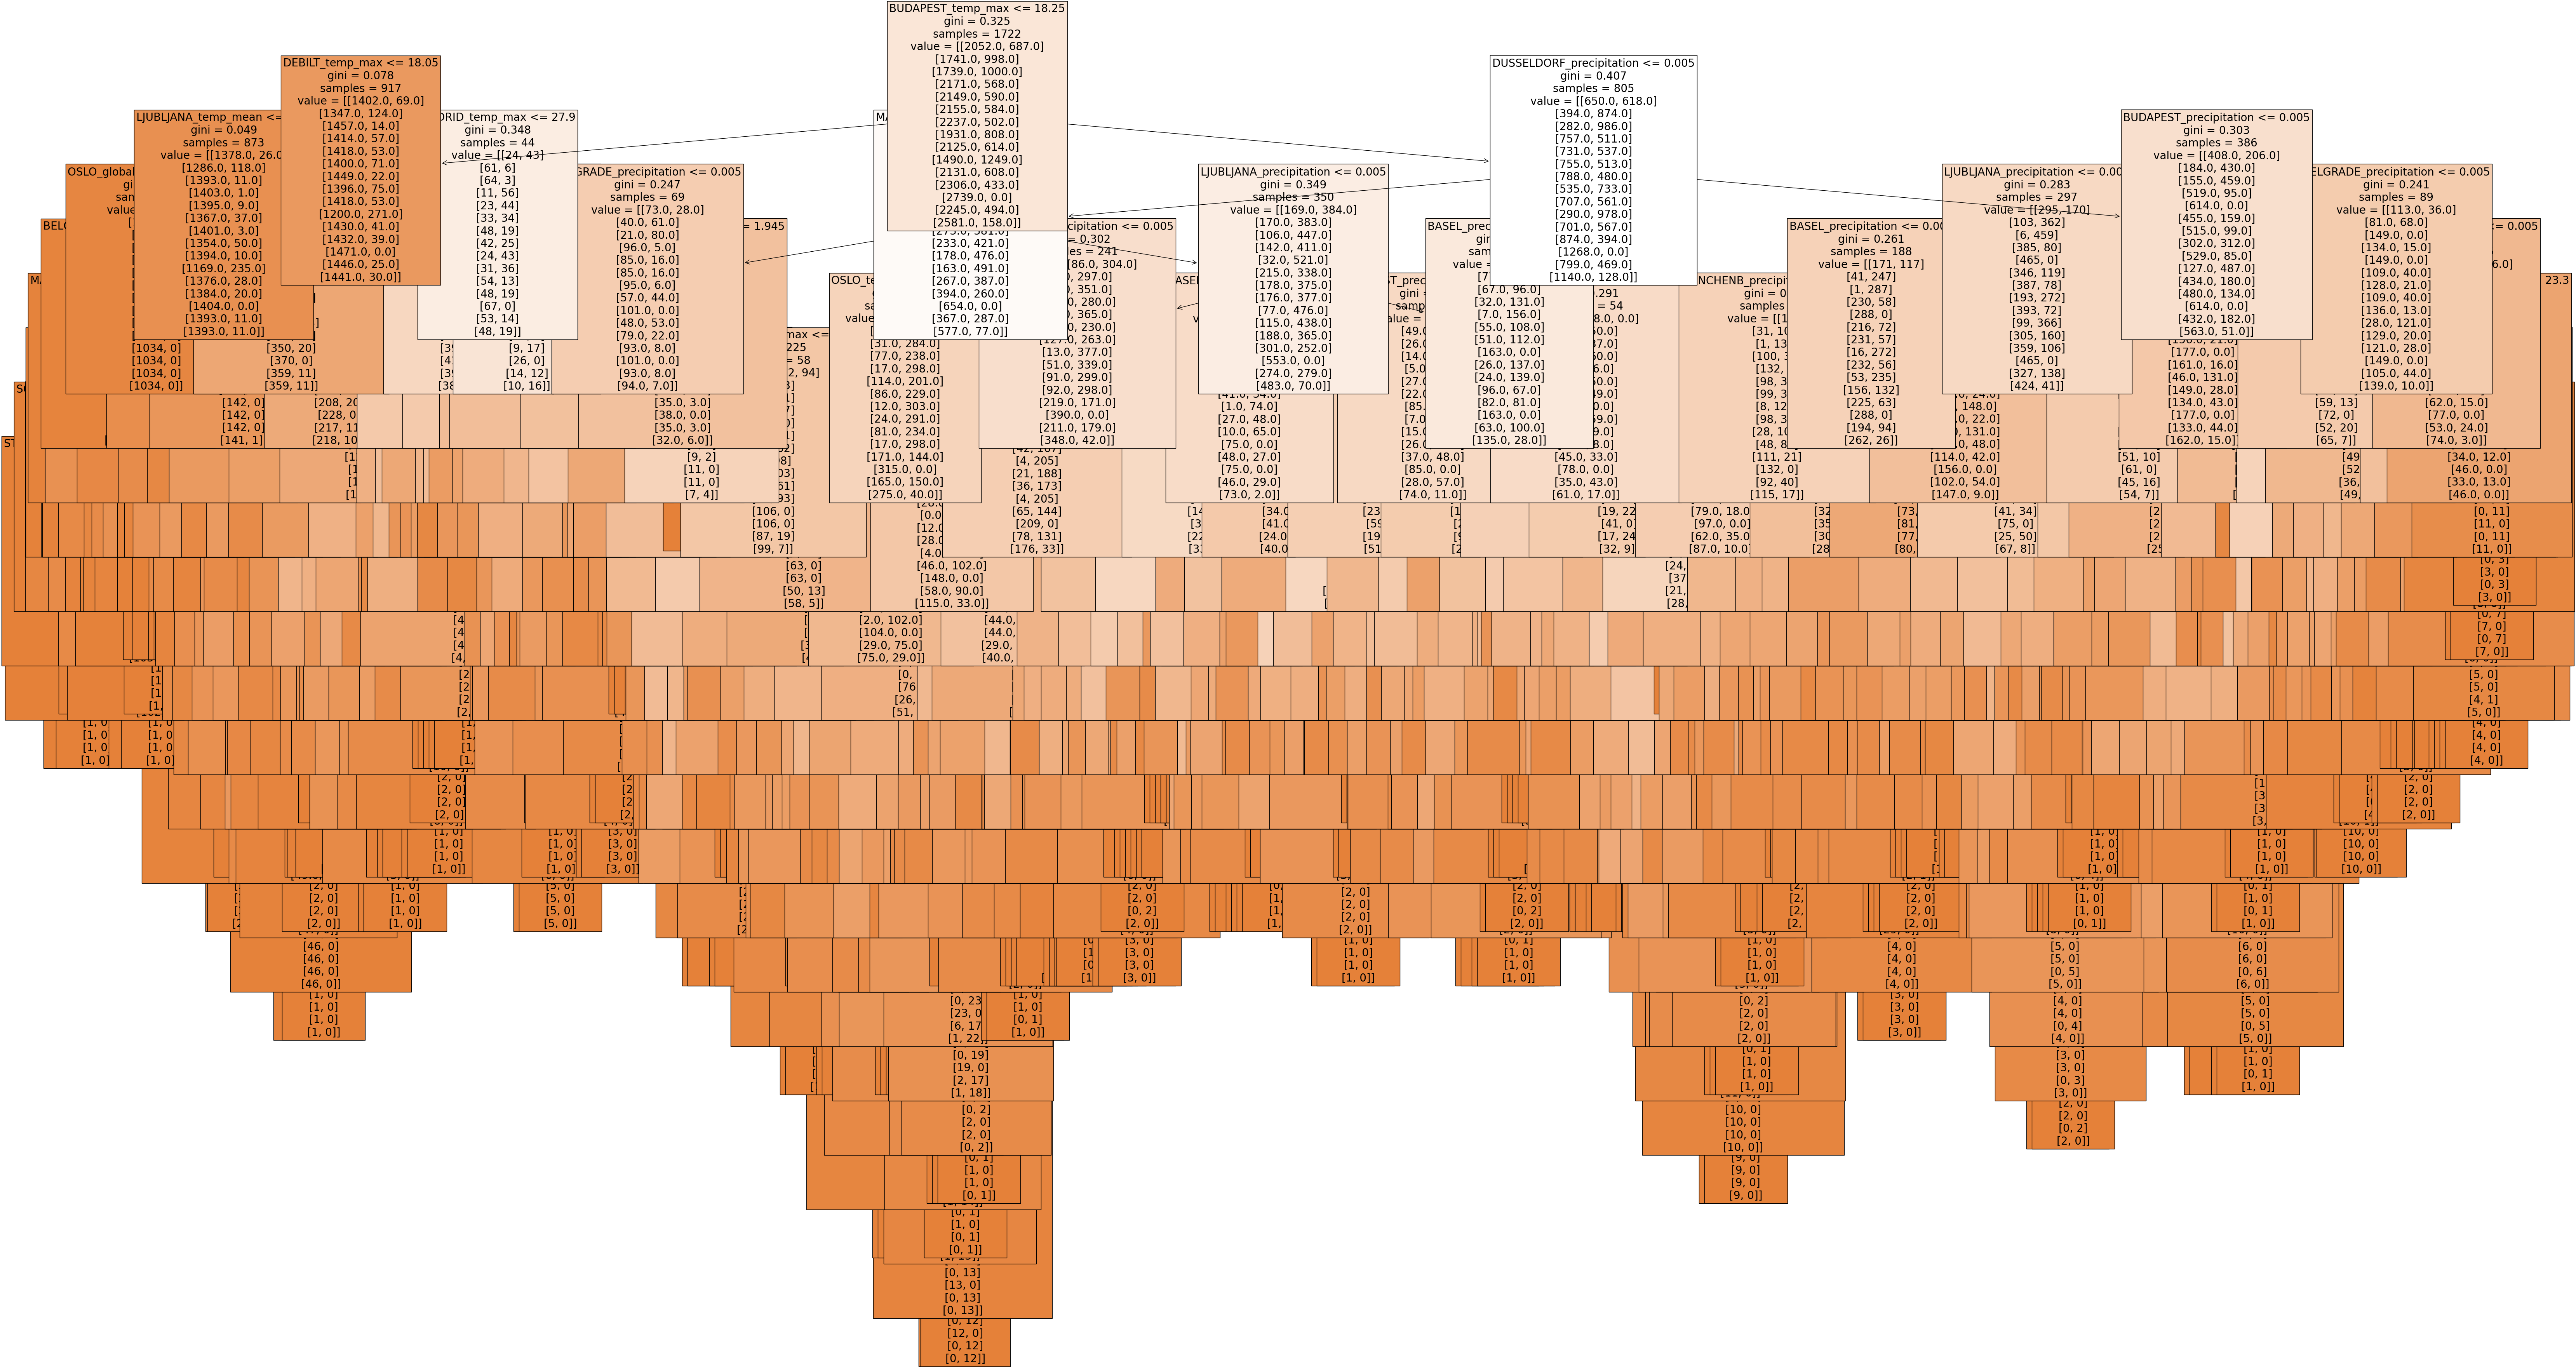

In [69]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, feature_names = dfdecade.columns, class_names=['unpleasant', 'pleasant'], filled=True);

In [71]:
fig.savefig(os.path.join(path, 'Visualizations', 'optimized_random_forest_2000s.png'),bbox_inches='tight')

In [73]:
# Discovering feature importances
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(135,)


array([0.00140916, 0.0020552 , 0.00177473, 0.00286147, 0.0223384 ,
       0.0030325 , 0.00287261, 0.0016774 , 0.03147058, 0.00249395,
       0.00264169, 0.00192494, 0.00225493, 0.03183913, 0.003362  ,
       0.00352749, 0.00169627, 0.00877552, 0.00171316, 0.00254661,
       0.00209438, 0.0025658 , 0.01880976, 0.00303004, 0.01009018,
       0.00173734, 0.02227766, 0.00218696, 0.00174587, 0.00227734,
       0.00238804, 0.02209757, 0.00281503, 0.00175446, 0.00185596,
       0.0435189 , 0.00183494, 0.0017887 , 0.00196722, 0.00231877,
       0.04088871, 0.0039143 , 0.01100254, 0.00181582, 0.10453409,
       0.00146726, 0.00295228, 0.00245106, 0.00325256, 0.01240067,
       0.00307337, 0.00243949, 0.00177104, 0.00751786, 0.00293772,
       0.00212872, 0.00198783, 0.00220293, 0.01591939, 0.00270531,
       0.00720693, 0.00198144, 0.02241153, 0.00234711, 0.00277301,
       0.00176967, 0.00290205, 0.02950679, 0.00332377, 0.00466499,
       0.00201876, 0.01277482, 0.00313533, 0.00190821, 0.00209

In [75]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00140916, 0.0020552 , 0.00177473, 0.00286147, 0.0223384 ,
         0.0030325 , 0.00287261, 0.0016774 , 0.03147058],
        [0.00249395, 0.00264169, 0.00192494, 0.00225493, 0.03183913,
         0.003362  , 0.00352749, 0.00169627, 0.00877552],
        [0.00171316, 0.00254661, 0.00209438, 0.0025658 , 0.01880976,
         0.00303004, 0.01009018, 0.00173734, 0.02227766],
        [0.00218696, 0.00174587, 0.00227734, 0.00238804, 0.02209757,
         0.00281503, 0.00175446, 0.00185596, 0.0435189 ],
        [0.00183494, 0.0017887 , 0.00196722, 0.00231877, 0.04088871,
         0.0039143 , 0.01100254, 0.00181582, 0.10453409],
        [0.00146726, 0.00295228, 0.00245106, 0.00325256, 0.01240067,
         0.00307337, 0.00243949, 0.00177104, 0.00751786],
        [0.00293772, 0.00212872, 0.00198783, 0.00220293, 0.01591939,
         0.00270531, 0.00720693, 0.00198144, 0.02241153],
        [0.00234711, 0.00277301, 0.00176967, 0.00290205, 0.02950679,
         0.00332377, 0.00466499, 0.0020187

In [77]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.06949205, 0.05851592, 0.06486494, 0.08064012, 0.17006509,
       0.03732559, 0.0594818 , 0.06208097, 0.14848865, 0.07131076,
       0.0649912 , 0.04000171, 0.01669223, 0.03400308, 0.02204588])

In [79]:
# Extract stations list

stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [81]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [83]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [85]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

STOCKHOLM     0.170065
LJUBLJANA     0.148489
MADRID        0.080640
BUDAPEST      0.071311
KASSEL        0.069492
DEBILT        0.064991
OSLO          0.064865
DUSSELDORF    0.062081
BELGRADE      0.059482
MAASTRICHT    0.058516
HEATHROW      0.040002
MUNCHENB      0.037326
BASEL         0.034003
VALENTIA      0.022046
SONNBLICK     0.016692
dtype: float64

In [87]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['KASSEL', 'MAASTRICHT', 'OSLO', 'MADRID', 'STOCKHOLM', 'MUNCHENB', 'BELGRADE', 'DUSSELDORF', 'LJUBLJANA', 'BUDAPEST', 'DEBILT', 'HEATHROW', 'SONNBLICK', 'BASEL', 'VALENTIA']


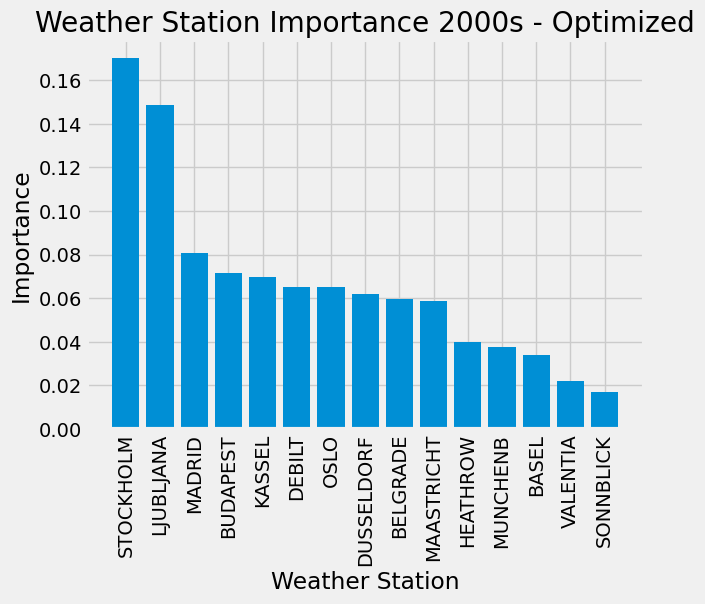

In [89]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2000s - Optimized')

plt.savefig(os.path.join(path, 'Visualizations', 'optimized_2000s_feauture_importances.png'), bbox_inches='tight')

plt.show()